# Introduction

*This notebook is prepared to engineer the features that will be used in model development and optimization process*

*Prepared by :*
**Faris Arief Mawardi**

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [2]:
# Import pandas packages for processing and manipulating datas
import pandas as pd 
# Import the fiter warnings to 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

---
## 2. Load data

In [17]:
df = pd.read_csv('data_after_EDA.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_23204\1596331515.py:1: DtypeWarning: Columns (1,5,6,7,8,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data_after_EDA.csv')


In [5]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [18]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [19]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


**Merging new datas (diff) and datasets after EDA (df)**

In [20]:
df = pd.merge(df, diff, on='id') # Merging the diff dataset into df dataset
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1.0,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1.0,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1.0,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1.0,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,1.0,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961


*Now, before we proceed into the next process of feature engineering, we will perform some features selections consists of the process of dropping mising values*

In [21]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0 to 175148
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   id                               175149 non-null  object        
 1   channel_sales                    175149 non-null  object        
 2   cons_12m                         175149 non-null  float64       
 3   cons_gas_12m                     175149 non-null  float64       
 4   cons_last_month                  175149 non-null  float64       
 5   date_activ                       175149 non-null  datetime64[ns]
 6   date_end                         175149 non-null  datetime64[ns]
 7   date_modif_prod                  175149 non-null  datetime64[ns]
 8   date_renewal                     175149 non-null  datetime64[ns]
 9   forecast_cons_12m                175149 non-null  float64       
 10  forecast_cons_year               175149 non-null 

**Insights :** Missing values have been dropped

**Target Class Balanceness Analysis**

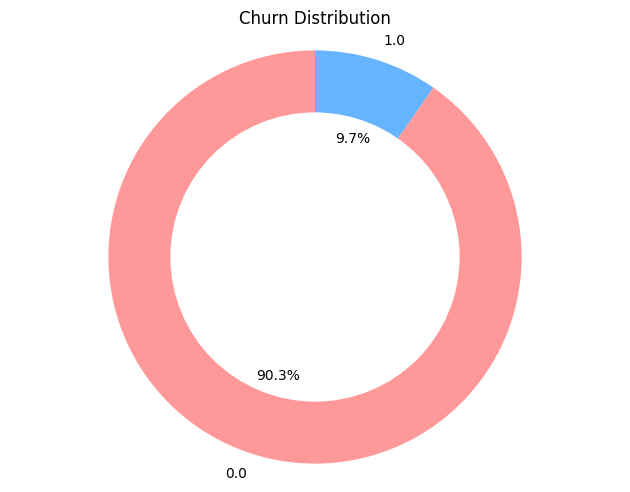

In [23]:
# Import Matplotlib, Seaborn, and PrettyTable from prettytable for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
# Count the values in the 'churn' column
churn_counts = df['churn'].value_counts()

# Calculate percentages
percentages = churn_counts / churn_counts.sum() * 100

# Create a pie chart
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#ff9999', '#66b3ff']  # You can change colors here

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()

# Set title
plt.title('Churn Distribution')

# Show the plot
plt.show()

**Insight:**

The target class is not balanced, with the target class (churn) being the minority 

*Next, we will proceed to split the x and y of the datas to start feature engineering process*

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(['churn'], axis = 1)    # The features (X) consist of all columns except the 'churn' column.
y = df['churn']                     # The target (y) in this project is 'churn'.

In [32]:
X

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,0.020057,3.700961
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,43.648,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,0.020057,3.700961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,10.392,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,10.392,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,10.392,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730.0,0.0,0.0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,10.392,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000,-0.004628,-0.000001


In [33]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
175144    0.0
175145    0.0
175146    0.0
175147    0.0
175148    0.0
Name: churn, Length: 175149, dtype: float64

**Insight :**

Splitting the datas into X and y is succeed. 

*Next, we will proceed to split the train and test datas*

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
print('Size X Train:', X_train.shape)
print('Size X Test:', X_test.shape)

Size X Train: (122604, 34)
Size X Test: (52545, 34)


*The train and test data splits are successful*. Now, proceed to the target class balancing

In [35]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Get the unique class labels from the target variable y
classes = np.unique(y)

# Calculate the class weights for balancing the classes in the target variable y
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y) # 'balanced' mode adjusts the weights inversely proportional to class frequencies in the input data

# Create a dictionary mapping each class label to its corresponding computed weight
class_weights = dict(zip(classes, weights))

# Output the calculated class weights for each unique class in the target variable y
class_weights


{0.0: 0.5537572875697141, 1.0: 5.150532259013115}

**Insight :**

The class weights indicate an imbalanced dataset with class 1.0 being less represented than class 0.0. The weight of class 1.0 (5.151) is notably higher than that of class 0.0 (0.554). This suggests that the model should prioritize learning from class 1.0 instances during training to improve predictions for the underrepresented class. *Next, we will encode the categorical columns*

**Features Encoding**

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0 to 175148
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   id                               175149 non-null  object        
 1   channel_sales                    175149 non-null  object        
 2   cons_12m                         175149 non-null  float64       
 3   cons_gas_12m                     175149 non-null  float64       
 4   cons_last_month                  175149 non-null  float64       
 5   date_activ                       175149 non-null  datetime64[ns]
 6   date_end                         175149 non-null  datetime64[ns]
 7   date_modif_prod                  175149 non-null  datetime64[ns]
 8   date_renewal                     175149 non-null  datetime64[ns]
 9   forecast_cons_12m                175149 non-null  float64       
 10  forecast_cons_year               175149 non-null 

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
cols_to_encode = ['id','channel_sales','date_activ','date_end','date_modif_prod','date_renewal','has_gas','origin_up','price_date']
col_pipeline = make_pipeline(OneHotEncoder())                                             # scaling categorical features using OneHotEncoder()
prep = ColumnTransformer([
    ('nominal', col_pipeline, cols_to_encode)],
    remainder='passthrough')
prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('nominal',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['id', 'channel_sales', 'date_activ',
                                  'date_end', 'date_modif_prod', 'date_renewal',
                                  'has_gas', 'origin_up', 'price_date'])])

In [39]:
XTrain_transformed = prep.fit_transform(X_train)
XTest_transformed = prep.transform(X_test)

# **Model Definitions**

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf = make_pipeline(prep, RandomForestClassifier(random_state=10))

# **Model Training**

In [41]:
# Random Forest
rf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nominal',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['id', 'channel_sales',
                                                   'date_activ', 'date_end',
                                                   'date_modif_prod',
                                                   'date_renewal', 'has_gas',
                                                   'origin_up',
                                                   'price_date'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=10))])

In [42]:
pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

# **Model Evaluations**

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
train_confusion = confusion_matrix(y_train, pred_train)
test_confusion = confusion_matrix(y_test, pred_test) 

**Data Train Evaluations**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    110702
         1.0       1.00      1.00      1.00     11902

    accuracy                           1.00    122604
   macro avg       1.00      1.00      1.00    122604
weighted avg       1.00      1.00      1.00    122604



<Figure size 800x800 with 0 Axes>

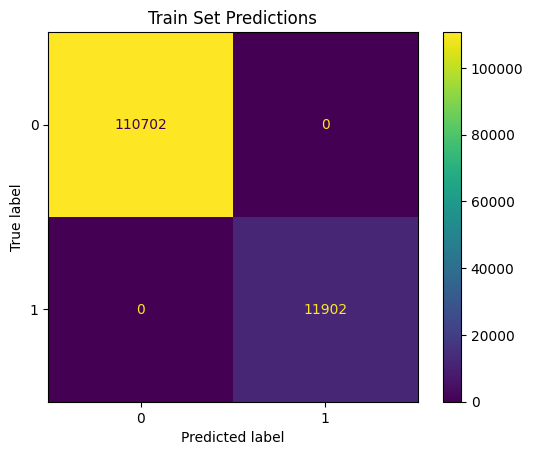

In [45]:
# Train set
print(classification_report(y_train, pred_train))
plt.figure(figsize=(8, 8))
train_cm_plot = ConfusionMatrixDisplay(confusion_matrix=train_confusion)
train_cm_plot.plot()
plt.title('Train Set Predictions')
plt.show()

**Data Test Evaluations**

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     47444
         1.0       1.00      1.00      1.00      5101

    accuracy                           1.00     52545
   macro avg       1.00      1.00      1.00     52545
weighted avg       1.00      1.00      1.00     52545



<Figure size 800x800 with 0 Axes>

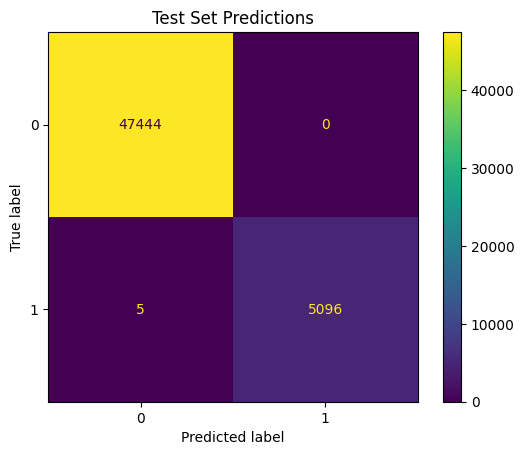

In [46]:
# Test set
print(classification_report(y_test, pred_test))
plt.figure(figsize=(8, 8))
test_cm_plot = ConfusionMatrixDisplay(confusion_matrix=test_confusion)
test_cm_plot.plot()
plt.title('Test Set Predictions')
plt.show()

**Insights :** 

The model showcases exceptional performance, achieving a flawless 100% prediction accuracy on the training set and only misclassifying 5 labels out of 52,545 in the test set. This outstanding accuracy suggests that the model is highly effective in its current state, requiring no immediate adjustments.

However, in scenarios where model tuning becomes necessary for further improvement, the choice of evaluation metrics is critical. For this project, employing recall and F-1 Score metrics is recommended. Recall is vital for reducing false negatives, ensuring accurate identification of churning customers. Meanwhile, F-1 Score, by considering both false negatives and false positives, bolsters the model's ability to predict customer churn more accurately and comprehensively. These metrics serve as valuable indicators for enhancing the model's predictive capabilities, particularly in minimizing misclassifications related to churn prediction.